In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.decomposition import PCA
import xgboost as xgb
import lightgbm as lgbm
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print(f"Number of Rows {df.shape[0]} and number of colummns {df.shape[1]}")

Number of Rows 768 and number of colummns 9


In [ ]:
def cal_median(df,target,var):
    temp = df[df[var].notnull()]
    temp = temp[[var,target]].groupby([target])[[var]].median().reset_index()
    return temp

In [ ]:
def median_imputation(df,target,var,var_0,var_1):
    for i in range(len(df)):
        if df.loc[i,target] == 0 and df.loc[i,var] == 0:
            df.loc[i,var]=var_0

        if df.loc[i,target] == 1 and df.loc[i,var] == 0:
            df.loc[i,var] = var_1

In [ ]:
d = cal_median(df,"Outcome","Insulin")
d

,Outcome,Insulin
0,0,39.0
1,1,0.0


In [ ]:
median_imputation(df,"Outcome","Insulin",d.loc[0,"Insulin"],d.loc[1,"Insulin"])
d=cal_median(df,"Outcome","Glucose")
d

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [ ]:
median_imputation(df,"Outcome","Glucose",d.loc[0,"Glucose"],d.loc[1,"Glucose"])
d=cal_median(df,"Outcome","SkinThickness")
d

,Outcome,SkinThickness
0,0,21.0
1,1,27.0


In [ ]:
median_imputation(df,"Outcome","SkinThickness",d.loc[0,"SkinThickness"],d.loc[1,"SkinThickness"])
d=cal_median(df,"Outcome","BloodPressure")
d

,Outcome,BloodPressure
0,0,70.0
1,1,74.0


In [ ]:
median_imputation(df,"Outcome","BloodPressure",d.loc[0,"BloodPressure"],d.loc[1,"BloodPressure"])
d=cal_median(df,"Outcome","BMI")
d

,Outcome,BMI
0,0,30.05
1,1,34.25


In [ ]:
median_imputation(df,"Outcome","BMI",d.loc[0,"BMI"],d.loc[1,"BMI"])

In [ ]:
import plotly.express as exp
import plotly.io as pio

def plot_data(df,varx,vary,target):
    pio.templates.default="simple_white"
    exp.defaults.template = "ggplot2"
    exp.defaults.color_continuous_scale = exp.colors.sequential.Blackbody
    exp.defaults.width = 800
    exp.defaults.height = 600
    fig = exp.scatter(df,x=varx,y=vary,color=target)
    fig.show()

In [ ]:
plot_data(df,"Glucose","Age","Outcome")

In [ ]:
df.loc[:,"N1"] = 1
df.loc[(df['Age']<=30) & (df['Glucose']<=120),"N1"]=0
df.loc[(df['Age']>30) & (df['Age']<48) & (df['Glucose']<=88),"N1"]=0
df.loc[(df['Age']>=63) & (df['Glucose']<=142),"N1"]=0

In [ ]:
df.loc[:,'N2']=1
df.loc[(df['BMI']<=30),'N2']=0
plot_data(df,"Pregnancies","Age","Outcome")

In [ ]:
df.loc[:,'N3']=1
df.loc[(df['Age']<=27) & (df['Pregnancies']<=6),'N3']=0
df.loc[(df['Age']>60) & (df['Pregnancies']>7.5),'N3']=0
plot_data(df,"Glucose","BloodPressure","Outcome")

In [ ]:
df.loc[:,'N4']=1
df.loc[(df['Glucose']<=105) & (df['BloodPressure']<=80),'N4']=0
df.loc[(df['Glucose']<=105) & (df['BloodPressure']>83),'N4']=0 #extra
df.loc[:,'N5']=1
df.loc[(df['SkinThickness']<=20) ,'N5']=0
plot_data(df,"SkinThickness","BMI","Outcome")

In [ ]:
df.loc[:,'N6']=1
df.loc[(df['BMI']<30) & (df['SkinThickness']<=20),'N6']=0
df.loc[(df['BMI']>33) & (df['SkinThickness']<=20),'N6']=0
plot_data(df,"Glucose","BMI","Outcome")

In [ ]:
df.loc[:,'N7']=1
df.loc[(df['Glucose']<=105) & (df['BMI']<=30),'N7']=0
df.loc[(df['Glucose']<=105) & (df['BMI'] >=40),'N7']=0
df.loc[:,'N9']=1
df.loc[(df['Insulin']<200),'N9']=0
df.loc[:,'N10']=1
df.loc[(df['BloodPressure']<80),'N10']=0

In [ ]:
df.loc[:,'N11']=1
df.loc[(df['Pregnancies']<4) & (df['Pregnancies']!=0) ,'N11']=0
df['N0'] = df['BMI'] * df['SkinThickness']

df['N8'] =  df['Pregnancies'] / df['Age']

df['N13'] = df['Glucose'] / df['DiabetesPedigreeFunction']

df['N12'] = df['Age'] * df['DiabetesPedigreeFunction']

In [ ]:
df.loc[:,'N15']=1
df.loc[(df['N0']<1034) ,'N15']=0
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,N1,...,N6,N7,N9,N10,N11,N0,N8,N13,N12,N15
0,6,148,72,35,0,33.6,0.627,50,1,1,...,1,1,0,0,1,1176.0,0.120000,236.044657,31.350,1
1,1,85,66,29,39,26.6,0.351,31,0,0,...,1,0,0,0,0,771.4,0.032258,242.165242,10.881,0
2,8,183,64,27,0,23.3,0.672,32,1,1,...,1,1,0,0,1,629.1,0.250000,272.321429,21.504,0
3,1,89,66,23,94,28.1,0.167,21,0,0,...,1,0,0,0,0,646.3,0.047619,532.934132,3.507,0
4,0,137,40,35,168,43.1,2.288,33,1,1,...,1,1,0,0,1,1508.5,0.000000,59.877622,75.504,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,...,1,1,0,0,1,1579.2,0.158730,590.643275,10.773,1
764,2,122,70,27,39,36.8,0.340,27,0,1,...,1,1,0,0,0,993.6,0.074074,358.823529,9.180,0
765,5,121,72,23,112,26.2,0.245,30,0,1,...,1,1,0,0,1,602.6,0.166667,493.877551,7.350,0
766,1,126,60,27,0,30.1,0.349,47,1,1,...,1,1,0,0,0,812.7,0.021277,361.031519,16.403,0


In [ ]:
y=pd.DataFrame(df["Outcome"])
x= df.drop("Outcome",axis=1)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in y.columns:
    y[col]= encoder.fit_transform(y[col])

In [ ]:
y = y["Outcome"]
cols=["N1","N2","N3","N4","N5","N6","N7","N9","N10","N11"]
for col in cols:
    x[col]=encoder.fit_transform(x[col])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [ ]:
models = []
models.append(("LR", LogisticRegression(solver="lbfgs", max_iter=1000)))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("NB", GaussianNB()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("SVM", SVC()))

In [ ]:
names = []
results = []
for name, model in models:
  cv = KFold(n_splits=10, random_state=None)
  scores = cross_val_score(model, x_train, y_train, scoring="accuracy", cv=cv)
  names.append(name)
  results.append(scores)
  print("%s %.2f (%.2f)" % (name, scores.mean(), scores.std()))

LR 0.78 (0.05)
LDA 0.79 (0.04)
KNN 0.74 (0.06)
NB 0.75 (0.06)
CART 0.84 (0.05)
SVM 0.66 (0.05)


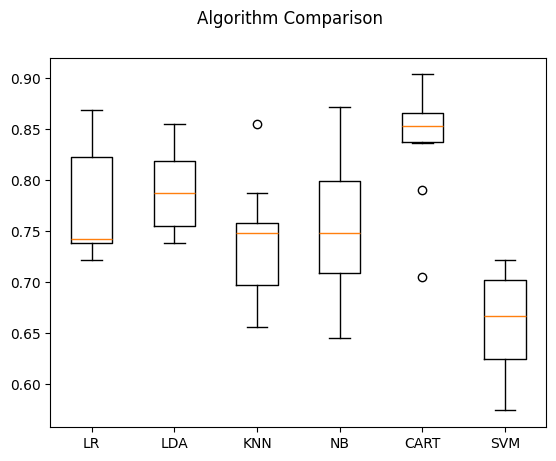

In [ ]:
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
pipelines = []
pipelines.append(("scalerLR", Pipeline([("scaler", StandardScaler()), ("LR", LogisticRegression(solver="lbfgs", max_iter=1000))])))
pipelines.append(("scalerLDA", Pipeline([("scaler", StandardScaler()), ("LDA", LinearDiscriminantAnalysis())])))
pipelines.append(("scalerKNN", Pipeline([("scaler", StandardScaler()), ("KNN", KNeighborsClassifier())])))
pipelines.append(("scalerNB", Pipeline([("scaler", StandardScaler()), ("NB", GaussianNB())])))
pipelines.append(("scalerCART", Pipeline([("scaler", StandardScaler()), ("CART", DecisionTreeClassifier())])))
pipelines.append(("scalerSVM", Pipeline([("scaler", StandardScaler()), ("SVM", SVC())])))

In [ ]:
names = []
results = []
for name, model in pipelines:
  cv = KFold(n_splits=10, random_state=None)
  scores = cross_val_score(model, x_train, y_train, scoring="accuracy", cv=cv)
  names.append(name)
  results.append(scores)
  print("%s %.3f (%.3f)" % (name, scores.mean(), scores.std()))

scalerLR 0.791 (0.043)
scalerLDA 0.788 (0.040)
scalerKNN 0.761 (0.046)
scalerNB 0.754 (0.064)
scalerCART 0.852 (0.061)
scalerSVM 0.780 (0.039)


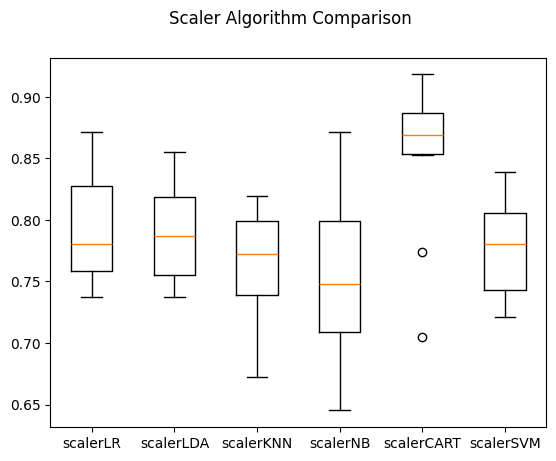

In [ ]:
fig = plt.figure()
fig.suptitle("Scaler Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [ ]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

In [ ]:
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=10, random_state=None)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring="accuracy")
  results.append(cv_results)
  names.append(name)
  print("%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()))

AB: 0.875 (0.036)
GBM: 0.901 (0.047)
RF: 0.899 (0.039)
ET: 0.845 (0.042)


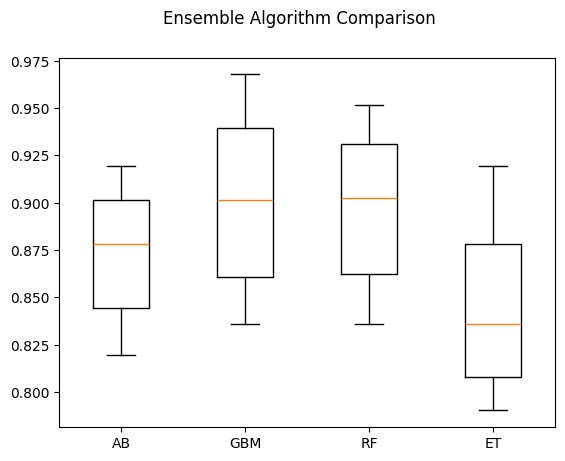

In [ ]:
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
ensembles = []
ensembles.append(("scalerRF", Pipeline([("scaler", StandardScaler()), ("RF", RandomForestClassifier())])))
ensembles.append(("scalerGBM", Pipeline([("scaler", StandardScaler()), ("GBM", GradientBoostingClassifier())])))
ensembles.append(("scalerET", Pipeline([("scaler", StandardScaler()), ("ET", ExtraTreesClassifier())])))
ensembles.append(("scalerAB", Pipeline([("scaler", StandardScaler()), ("AB", AdaBoostClassifier())])))

In [ ]:
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=10, random_state=None)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring="accuracy")
  results.append(cv_results)
  names.append(name)
  print("%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()))

scalerRF: 0.892 (0.033)
scalerGBM: 0.902 (0.045)
scalerET: 0.837 (0.064)
scalerAB: 0.875 (0.036)


scalerRF: 0.888 (0.038)
Confusion Matrix for scalerRF:
[[89 10]
 [ 9 46]]
Classification Report for scalerRF:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        99
           1       0.82      0.84      0.83        55

    accuracy                           0.88       154
   macro avg       0.86      0.87      0.87       154
weighted avg       0.88      0.88      0.88       154

scalerGBM: 0.902 (0.045)
Confusion Matrix for scalerGBM:
[[91  8]
 [ 9 46]]
Classification Report for scalerGBM:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        99
           1       0.85      0.84      0.84        55

    accuracy                           0.89       154
   macro avg       0.88      0.88      0.88       154
weighted avg       0.89      0.89      0.89       154

scalerET: 0.845 (0.045)
Confusion Matrix for scalerET:
[[83 16]
 [11 44]]
Classification Report for scalerET:
             

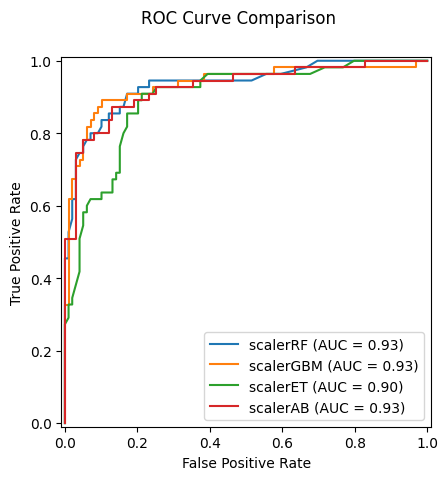

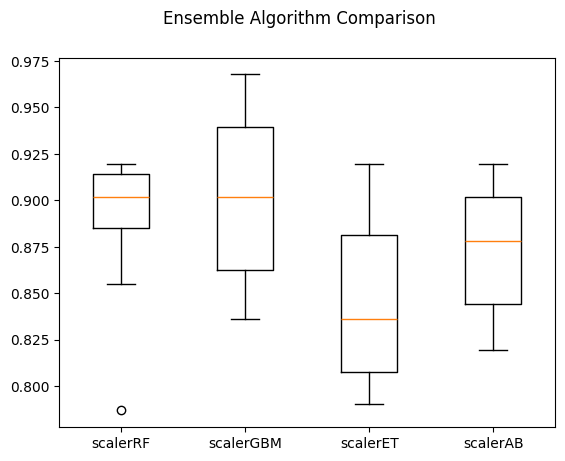

In [ ]:
results = []
names = []
roc_fig, roc_ax = plt.subplots()
roc_fig.suptitle('ROC Curve Comparison')

for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print("%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()))
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name).plot(ax=roc_ax)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n{conf_matrix}")
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:\n{report}")
plt.show()

fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()